In [2]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project

using CairoMakie, DelimitedFiles, Statistics
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
set_theme!(theme_ggplot2())

  Activating project at `~/code/gitHub/CarbonI`


In [3]:
# Load data
cov = readdlm("../../data/global_coverage.dat")

12×3 Matrix{Float64}:
 2.4229e8   2.08072e8  184.6
 2.40617e8  2.064e8    183.1
 2.21021e8  1.86804e8  165.7
 2.65563e8  2.29057e8  203.2
 2.32697e8  1.96191e8  174.0
 2.36625e8  2.00119e8  177.5
 2.33185e8  1.96679e8  174.5
 2.38709e8  2.02202e8  179.4
 2.35415e8  1.98909e8  176.4
 2.48631e8  2.14413e8  190.2
 2.60243e8  2.26025e8  200.5
 2.312e8    1.96982e8  174.7

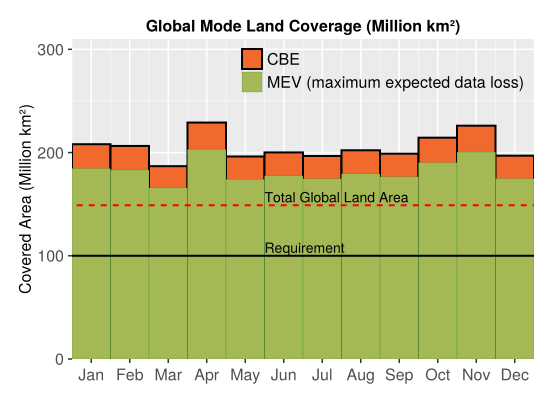

In [37]:
f = Figure(resolution=(550,400))
globalLandArea = 148.940;
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"];
ax = Axis(f[1,1], xticks=(1:12, months), ylabel="Covered Area (Million km²)",  title="Global Mode Land Coverage (Million km²)")
# For CH4 (100 and 120e-)
barplot!(ax, 1:12., cov[:,2]/1e6, gap = 0,color=CarbonI_colors[5], linewidth=3,strokecolor = :black,strokewidth = 2, label="CBE")
barplot!(ax, 1:12., cov[:,3], gap = 0.0,color=CarbonI_colors[2], linewidth=3,strokecolor = :green,strokewidth = 0.2, label="MEV (maximum expected data loss)", alpha=0.5)
#barplot!(ax, 1:12., ones(12)*100, gap = 0.,color=CarbonI_colors[6], linewidth=3, label="Requirement", strokecolor = CarbonI_colors[1],strokewidth = 2)
lines!(ax, 0:13., ones(14)*globalLandArea, color=:red, linestyle=:dash, linewidth=2)
text!(ax,"Total Global Land Area", position=(5.5, globalLandArea), color=:black, halign=:left, valign=:center, fontsize=14)
lines!(ax, 0:13., ones(14)*100, color=:black,  linewidth=2)
text!(ax,"Requirement", position=(5.5, 100), color=:black, halign=:left, valign=:center, fontsize=14)

xlims!(ax,0.5,12.5)
ylims!(ax,0.,310)
axislegend(ax,position = :rt)
save("../../plots/final/GlobalCoverage-CarbonI.pdf",f)
f